In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import missingno as msno

In [4]:
data = pd.read_csv('/kaggle/input/project-1-dataset/dataset - netflix1.csv')

In [5]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [16]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
5      s9  TV Show     The Great British Baking Show  Andy Devonshire   

          country date_added  release_year rating   duration  \
0   United States  9/25/2021          2020  PG-13     90 min   
1          France  9/24/2021          2021  TV-MA   1 Season   
2   United States  9/24/2021          2021  TV-MA   1 Season   
3          Brazil  9/22/2021          2021  TV-PG     91 min   
5  United Kingdom  9/24/2021          2021  TV-14  9 Seasons   

                                           listed_in  \
0                                      Documentaries   
1  Crime TV Shows, International TV Shows, TV Act...   
2       

In [17]:
print(data.tail())

     show_id     type               title   director        country  \
8785   s8797  TV Show          Yunus Emre  Not Given         Turkey   
8786   s8798  TV Show           Zak Storm  Not Given  United States   
8787   s8801  TV Show  Zindagi Gulzar Hai  Not Given       Pakistan   
8788   s8784  TV Show                Yoko  Not Given       Pakistan   
8789   s8786  TV Show                 YOM  Not Given       Pakistan   

      date_added  release_year rating   duration  \
8785   1/17/2017          2016  TV-PG  2 Seasons   
8786   9/13/2018          2016  TV-Y7  3 Seasons   
8787  12/15/2016          2012  TV-PG   1 Season   
8788   6/23/2018          2016   TV-Y   1 Season   
8789    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  \
8785                  International TV Shows, TV Dramas   
8786                                           Kids' TV   
8787  International TV Shows, Romantic TV Shows, TV ...   
8788                    

In [7]:
missing_values = data.isna().sum()
print("missing values:")
print(missing_values)

missing values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [8]:
print("Shape of data:", data.shape)
data = data.dropna()
print("Shape of data:", data.shape)
#since there are no missing values in the given dataset there is no replacement required

Shape of data: (8790, 10)
Shape of data: (8790, 10)


In [9]:
duplicates_before = data.duplicated().sum()
print("number of duplicates are",duplicates_before)

data.drop_duplicates(inplace=True)
duplicates_after = data.duplicated().sum()
print("Number of duplicates after",duplicates_after)

number of duplicates are 0
Number of duplicates after 0


In [10]:
num_values = data.select_dtypes(include=['number'])
O1 = num_values.quantile(0.25)
O3 = num_values.quantile(0.75)
IQR = O3 - O1
outlier_mask = (num_values < (O1 - 1.5 * IQR)) | (num_values > (O3 + 1.5 * IQR))
data = data[~outlier_mask.any(axis=1)]

In [11]:
data.to_csv("cleaned_data.csv",index=False)

In [12]:
print(data.describe())

       release_year
count   8073.000000
mean    2016.309922
std        3.786265
min     2004.000000
25%     2015.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


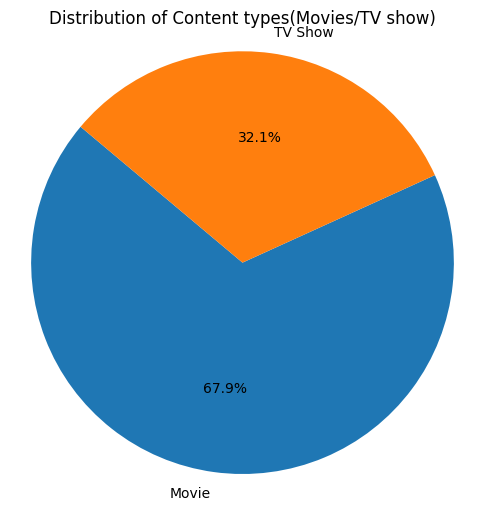

In [13]:
type_count = data['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_count,labels=type_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Content types(Movies/TV show)')
plt.axis('equal')
plt.show()

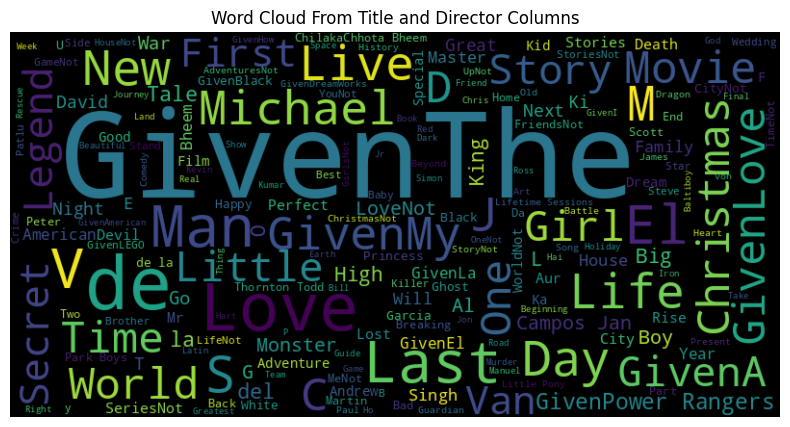

In [14]:
from wordcloud import WordCloud
data['combined'] = data['title']+ '' + data['director']
text = ''.join(data['combined'])
wordcloud = WordCloud(width=800,height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud From Title and Director Columns')
plt.show()